In [87]:
import pandas as pd
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys




In [88]:
path='GHI01-Jan-202228-Feb-2022.csv'
df = pd.read_csv(path, names=['Id', 'Date', 'Value'])    #ca trouvait pas le file quand le notebook etait dans code 
                            # oui coco j'ai essaye .append jsp quoi, j'ai pas reussi donc si toi tu 
                            #reussis dis moi

In [89]:
df.head()


,Id,Date,Value
0,NaN,time,value
1,0.0,01-Jan-2022 00:00:00,1.2100000000000002
2,1.0,01-Jan-2022 00:01:00,1.2496666666666667
3,2.0,01-Jan-2022 00:02:00,1.315333333333333
4,3.0,01-Jan-2022 00:03:00,1.2051666666666665


In [90]:
df = df.iloc[1: , :]  #on drop la premiere ligne 

In [91]:
df.head()


,Id,Date,Value
1,0.0,01-Jan-2022 00:00:00,1.2100000000000002
2,1.0,01-Jan-2022 00:01:00,1.2496666666666667
3,2.0,01-Jan-2022 00:02:00,1.315333333333333
4,3.0,01-Jan-2022 00:03:00,1.2051666666666665
5,4.0,01-Jan-2022 00:04:00,1.3443333333333336


In [92]:
df['Day'] = df['Date'].str[:2]
df['Day'] = df['Day'].astype(int)
df['Month']=df['Date'].str[3:6]
df['Year']=df['Date'].str[7:11]
df['Year']=df['Year'].astype(int)
df['Hour']=df['Date'].str[12:14]
df['Hour']=df['Hour'].astype(int)
df['Minute']=df['Date'].str[15:17]
df['Minute']=df['Minute'].astype(int)
df['Second']=df['Date'].str[18:20]
df['Second']=df['Second'].astype(int)

In [93]:
df.head()


,Id,Date,Value,Day,Month,Year,Hour,Minute,Second
1,0.0,01-Jan-2022 00:00:00,1.2100000000000002,1,Jan,2022,0,0,0
2,1.0,01-Jan-2022 00:01:00,1.2496666666666667,1,Jan,2022,0,1,0
3,2.0,01-Jan-2022 00:02:00,1.315333333333333,1,Jan,2022,0,2,0
4,3.0,01-Jan-2022 00:03:00,1.2051666666666665,1,Jan,2022,0,3,0
5,4.0,01-Jan-2022 00:04:00,1.3443333333333336,1,Jan,2022,0,4,0


In [94]:
month_nums = {"Month":     {"Jan": 1, "Feb": 2}}
df=df.replace(month_nums)

In [95]:
df.head()

,Id,Date,Value,Day,Month,Year,Hour,Minute,Second
1,0.0,01-Jan-2022 00:00:00,1.2100000000000002,1,1,2022,0,0,0
2,1.0,01-Jan-2022 00:01:00,1.2496666666666667,1,1,2022,0,1,0
3,2.0,01-Jan-2022 00:02:00,1.315333333333333,1,1,2022,0,2,0
4,3.0,01-Jan-2022 00:03:00,1.2051666666666665,1,1,2022,0,3,0
5,4.0,01-Jan-2022 00:04:00,1.3443333333333336,1,1,2022,0,4,0


In [96]:
df["Second"].value_counts()
#on a que des 0 pour les secondes => drop la colonne?

0    83520
Name: Second, dtype: int64

In [97]:
#df.plot(x='Hour', y='Value', kind='line')

Text(0, 0.5, 'Value')

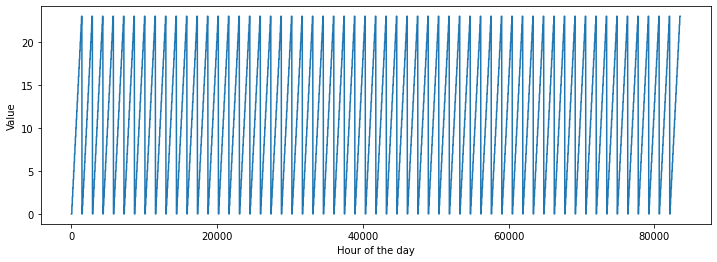

In [101]:
#marche pas 
fig, axs = plt.subplots(figsize=(12, 4))

df["Hour"].plot(
    kind='line', rot=0, ax=axs
)



plt.xlabel("Hour of the day")

plt.ylabel("Value")

In [120]:
path='GHI01-Jan-202228-Feb-2022.csv'
df = pd.read_csv(path, names=['Id', 'Date', 'Value']) 
df = df.iloc[1: , :]  #on drop la premiere ligne 
#month_nums = {"Date": {"Jan": "01", "Feb": "02"}}
df["Date"]=df["Date"].str.replace("Jan","01")
df["Date"]=df["Date"].str.replace("Feb","02")
df.head()

,Id,Date,Value
1,0.0,01-01-2022 00:00:00,1.2100000000000002
2,1.0,01-01-2022 00:01:00,1.2496666666666667
3,2.0,01-01-2022 00:02:00,1.315333333333333
4,3.0,01-01-2022 00:03:00,1.2051666666666665
5,4.0,01-01-2022 00:04:00,1.3443333333333336


In [121]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y %H:%M:%S")

In [122]:
df.head()

,Id,Date,Value
1,0.0,2022-01-01 00:00:00,1.2100000000000002
2,1.0,2022-01-01 00:01:00,1.2496666666666667
3,2.0,2022-01-01 00:02:00,1.315333333333333
4,3.0,2022-01-01 00:03:00,1.2051666666666665
5,4.0,2022-01-01 00:04:00,1.3443333333333336


In [124]:
df["Date"].min(), df["Date"].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2022-02-27 23:59:00'))

In [ ]:
df=df.drop(['Id'], axis=1)

In [146]:
df['Value']=df['Value'].astype(float)

In [147]:

consommation = df.set_index("Date")


consommation.head()

,Value
Date,
2022-01-01 00:00:00,1.210000
2022-01-01 00:01:00,1.249667
2022-01-01 00:02:00,1.315333
2022-01-01 00:03:00,1.205167
2022-01-01 00:04:00,1.344333


<AxesSubplot:xlabel='Date'>

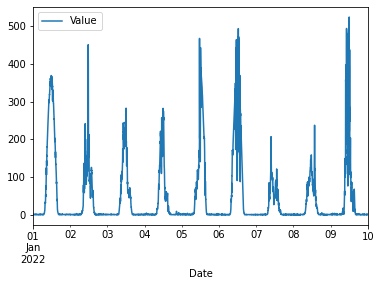

In [149]:
consommation["2022-01-01 00:00:00":"2022-01-10 00:00:00"].plot()